# **Bioinformatics Project - Computational Drug Discovery [Part 4] Regression Models with Random Forest**

Particularly, we will be building a machine learning model using the ChEMBL bioactivity data.

In **Part 4**, we will be building a regression model of acetylcholinesterase inhibitors using the random forest algorithm.

---

## **1. Import libraries**

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

## **2. Load the data set**

In [2]:
! wget https://raw.githubusercontent.com/vdopathi1/bioinformatics_final_project/main/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv

--2025-11-28 01:49:07--  https://raw.githubusercontent.com/vdopathi1/bioinformatics_final_project/main/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15030045 (14M) [text/plain]
Saving to: ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’

acetylcholinesteras 100%[===================>]  14.33M  --.-KB/s    in 0.1s    

2025-11-28 01:49:07 (109 MB/s) - ‘acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv’ saved [15030045/15030045]



In [3]:
import numpy as np
df = pd.read_csv('acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')
# Filter out rows where 'pIC50' is not finite
df = df[np.isfinite(df['pIC50'])]

In [4]:
df.shape

(8442, 882)

## **3. Input features**
The ***Acetylcholinesterase*** data set contains 881 input features and 1 output variable (pIC50 values).

### **3.1. Input features**

In [5]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8438,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8439,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8440,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8441,1,1,1,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


### **3.2. Output features**

In [6]:
Y = df.pIC50
Y

,pIC50
0,6.124939
1,7.000000
2,4.301030
3,6.522879
4,6.096910
...,...
8438,6.386158
8439,6.403403
8440,6.204120
8441,6.494850


### **3.3. Let's examine the data dimension**

In [7]:
X.shape

(8442, 881)

In [8]:
Y.shape

(8442,)

### **3.4. Remove low variance features**

In [9]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))
X = selection.fit_transform(X)

In [10]:
X.shape

(8442, 139)

## **4. Data split (80/20 ratio)**

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [12]:
X_train.shape, Y_train.shape

((6753, 139), (6753,))

In [13]:
X_test.shape, Y_test.shape

((1689, 139), (1689,))

## **5. Building a Regression Model using Random Forest**

In [14]:
import numpy as np

model = RandomForestRegressor(n_estimators=100)

# The filtering for finite pIC50 values is now handled earlier in the dataframe loading stage.
# So, X_train and Y_train should already be clean.
model.fit(X_train, Y_train)

r2 = model.score(X_test, Y_test)
r2

0.5113709382348435

In [15]:
Y_pred = model.predict(X_test)

## **6. Scatter Plot of Experimental vs Predicted pIC50 Values**

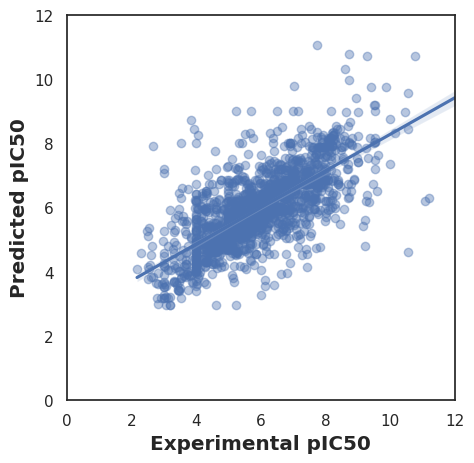

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(color_codes=True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(0, 12)
ax.set_ylim(0, 12)
ax.figure.set_size_inches(5, 5)
plt.show()